In [170]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Data Cleaning

In [99]:
df = pd.read_csv('c:/Users/nishant/Titanic/Train/Train.csv')

In [100]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          197
sibsp          0
parch          0
ticket         0
fare           1
cabin        780
embarked       1
boat         635
body         911
home.dest    427
dtype: int64

In [101]:
df.shape

(1009, 14)

In [102]:
df.head(n=10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.0000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.0000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.2500,NaN,Q,16,NaN,NaN
5,2.0,0.0,"Gaskell, Mr. Alfred",male,16.0,0.0,0.0,239865,26.0000,NaN,S,NaN,NaN,"Liverpool / Montreal, PQ"
6,2.0,0.0,"Phillips, Mr. Escott Robert",male,43.0,0.0,1.0,S.O./P.P. 2,21.0000,NaN,S,NaN,NaN,"Ilfracombe, Devon"
7,1.0,1.0,"Leader, Dr. Alice (Farnham)",female,49.0,0.0,0.0,17465,25.9292,D17,S,8,NaN,"New York, NY"
8,1.0,0.0,"Brandeis, Mr. Emil",male,48.0,0.0,0.0,PC 17591,50.4958,B10,C,NaN,208.0,"Omaha, NE"
9,2.0,0.0,"Wheeler, Mr. Edwin ""Frederick""",male,NaN,0.0,0.0,SC/PARIS 2159,12.8750,NaN,S,NaN,NaN,NaN


In [103]:
remove_col = ['name','boat','body','home.dest','ticket','cabin']
df = df.drop(remove_col,axis=1)

In [104]:
df.isnull().sum()

pclass        0
survived      0
sex           0
age         197
sibsp         0
parch         0
fare          1
embarked      1
dtype: int64

* For embarked column i am going to take mode the column
* for age i am trying to predict using Knn imputer
* for fare i am going to impute it using median

In [105]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [106]:
df["embarked"] = imp_freq.fit_transform(np.array(df["embarked"]).reshape((-1,1)))

In [107]:
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')

In [108]:
df['fare'] = imp_med.fit_transform(np.array(df["fare"]).reshape((-1,1)))

In [109]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_sex = OneHotEncoder(handle_unknown='ignore')

In [110]:
sex = enc_sex.fit_transform(np.array(df["sex"]).reshape((-1,1))).toarray()
embarked = enc.fit_transform(np.array(df["embarked"]).reshape((-1,1))).toarray()

In [111]:
df = df.drop(columns=['sex','embarked'])

In [112]:
df_sex = pd.DataFrame(sex,columns=['Male','Female'] )

In [113]:
df_embarked = pd.DataFrame(embarked,columns=enc.get_feature_names())

In [114]:
df = pd.concat([df,df_sex,df_embarked],axis=1)

In [115]:
imputer = KNNImputer(n_neighbors=5)

In [116]:
col = df.columns 

In [117]:
df=imputer.fit_transform(df)

In [118]:
df = pd.DataFrame(df,columns=col)

In [119]:
df

,pclass,survived,age,sibsp,parch,fare,Male,Female,x0_C,x0_Q,x0_S
0,3.0,0.0,27.3,0.0,0.0,7.7500,1.0,0.0,0.0,1.0,0.0
1,2.0,0.0,39.0,0.0,0.0,26.0000,0.0,1.0,0.0,0.0,1.0
2,2.0,1.0,40.0,0.0,0.0,13.0000,1.0,0.0,0.0,0.0,1.0
3,3.0,1.0,31.0,1.0,1.0,20.5250,1.0,0.0,0.0,0.0,1.0
4,3.0,1.0,22.2,2.0,0.0,23.2500,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1004,1.0,1.0,40.0,0.0,0.0,31.0000,0.0,1.0,1.0,0.0,0.0
1005,3.0,0.0,37.0,0.0,0.0,9.5875,1.0,0.0,0.0,0.0,1.0
1006,1.0,1.0,23.0,1.0,0.0,113.2750,1.0,0.0,1.0,0.0,0.0
1007,3.0,1.0,12.0,1.0,0.0,11.2417,0.0,1.0,1.0,0.0,0.0


In [ ]:
sex = enc_sex.inverse_transform(sex)

In [125]:
embarked = enc.inverse_transform(embarked)

In [128]:
df_sex = pd.DataFrame(sex,columns=['sex'])

In [129]:
df_embarked = pd.DataFrame(embarked,columns=['embarked'])

In [130]:
df = df.drop(columns=['Male','Female','x0_C','x0_Q','x0_S'],axis=1)

In [134]:
df = pd.concat([df,df_sex,df_embarked],axis=1)

# Classification 

In [137]:
df

,pclass,survived,age,sibsp,parch,fare,sex,embarked
0,3.0,0.0,27.3,0.0,0.0,7.7500,female,Q
1,2.0,0.0,39.0,0.0,0.0,26.0000,male,S
2,2.0,1.0,40.0,0.0,0.0,13.0000,female,S
3,3.0,1.0,31.0,1.0,1.0,20.5250,female,S
4,3.0,1.0,22.2,2.0,0.0,23.2500,female,Q
...,...,...,...,...,...,...,...,...
1004,1.0,1.0,40.0,0.0,0.0,31.0000,male,C
1005,3.0,0.0,37.0,0.0,0.0,9.5875,female,S
1006,1.0,1.0,23.0,1.0,0.0,113.2750,female,C
1007,3.0,1.0,12.0,1.0,0.0,11.2417,male,C


In [139]:
le = LabelEncoder()
df['sex']= le.fit_transform(df['sex'])

In [140]:
le_em = LabelEncoder()
df['embarked'] = le_em.fit_transform(df['embarked'])

In [141]:
df

,pclass,survived,age,sibsp,parch,fare,sex,embarked
0,3.0,0.0,27.3,0.0,0.0,7.7500,0,1
1,2.0,0.0,39.0,0.0,0.0,26.0000,1,2
2,2.0,1.0,40.0,0.0,0.0,13.0000,0,2
3,3.0,1.0,31.0,1.0,1.0,20.5250,0,2
4,3.0,1.0,22.2,2.0,0.0,23.2500,0,1
...,...,...,...,...,...,...,...,...
1004,1.0,1.0,40.0,0.0,0.0,31.0000,1,0
1005,3.0,0.0,37.0,0.0,0.0,9.5875,0,2
1006,1.0,1.0,23.0,1.0,0.0,113.2750,0,0
1007,3.0,1.0,12.0,1.0,0.0,11.2417,1,0


In [145]:
input_col = ['pclass','age','sibsp','parch','fare','sex','embarked']
output_col = ['survived']

In [149]:
X = df[input_col]
y = df[output_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [152]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(807, 7) (807, 1)
(202, 7) (202, 1)


In [167]:
acc_list = []

for i in np.arange(51):
    rf = RandomForestClassifier(criterion='entropy',max_depth=i)
    acc_list.append((cross_val_score(rf,X_train,y_train,cv=5).mean()))

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nishant\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\nishant\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_o

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

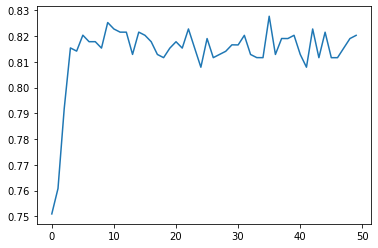

In [161]:
plt.plot(acc_list[1:])
plt.show()

In [166]:
np.argmax(acc_list[1:])

35

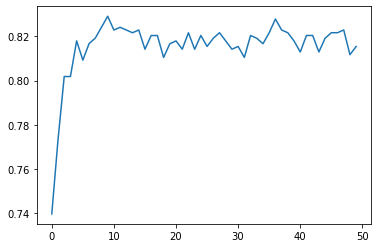

In [168]:
plt.plot(acc_list[1:])
plt.show()

In [169]:
np.argmax(acc_list[1:])

9

In [171]:
acc_list_gbdt = []

for i in np.arange(51):
    gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=i, random_state=0)
    acc_list_gbdt.append((cross_val_score(gbdt,X_train,y_train,cv=5).mean()))

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nishant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nishant\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "C:\Users\nishant\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\nishant\anaconda3\lib\site-pack

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

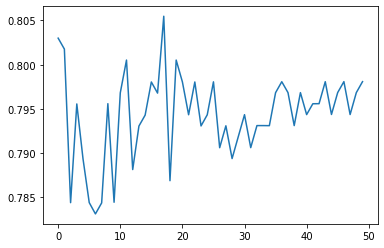

In [172]:
plt.plot(acc_list_gbdt[1:])
plt.show()

In [184]:
rf = RandomForestClassifier(n_estimators=2000,criterion='gini',max_depth=35)


In [185]:
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

<ipython-input-185-133cccfe5d78>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.9888475836431226

In [186]:
rf.score(X_test,y_test)

0.7821782178217822

In [187]:
test  =[]
train =[]
for i in range(1,100):
    rf = RandomForestClassifier(n_estimators=101,criterion='entropy',max_depth=i)
    rf.fit(X_train,y_train)
    test.append(rf.score(X_test,y_test))
    train.append(rf.score(X_train,y_train))
    



<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-187-cf27c257e2f3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

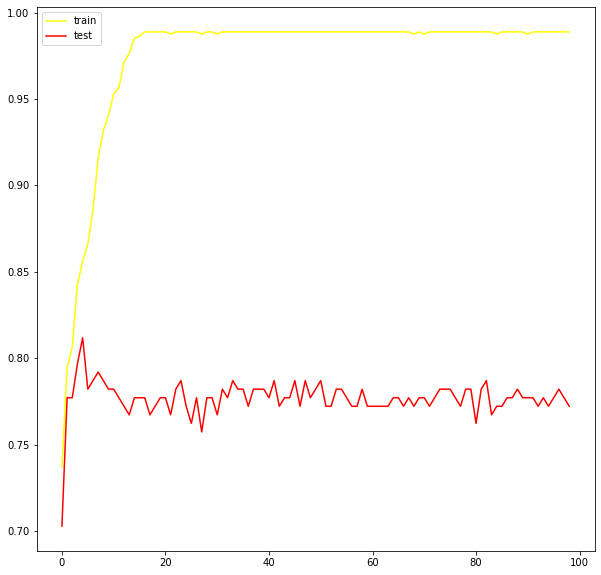

In [189]:
plt.figure(figsize=(10,10))
plt.plot(train,color='yellow',label='train')
plt.plot(test,color='red',label='test')
plt.legend()
plt.show()

In [190]:
np.argmax(test)

4

In [197]:
rf = RandomForestClassifier(n_estimators=101,criterion='entropy',max_depth=4)

In [198]:
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

<ipython-input-198-133cccfe5d78>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.838909541511772

In [199]:
rf.score(X_test,y_test)

0.7871287128712872

## Prediction

In [208]:
df_test = pd.read_csv('c:/Users/nishant/Titanic/Test/Test.csv')

In [209]:
df_test_train = df_test[input_col]

In [210]:
df_test_train.isnull().sum()

pclass       0
age         66
sibsp        0
parch        0
fare         0
sex          0
embarked     1
dtype: int64

In [212]:
df_test_train["embarked"] = imp_freq.transform(np.array(df_test_train["embarked"]).reshape((-1,1)))

<ipython-input-212-fc46f05ad769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_train["embarked"] = imp_freq.transform(np.array(df_test_train["embarked"]).reshape((-1,1)))


In [216]:
sex = enc_sex.transform(np.array(df_test_train["sex"]).reshape((-1,1))).toarray()
embarked = enc.transform(np.array(df_test_train["embarked"]).reshape((-1,1))).toarray()

In [221]:
df_sex = pd.DataFrame(sex)
df_em = pd.DataFrame(embarked)

In [224]:
df_test_train = df_test_train.drop(columns=['sex','embarked'],axis=1)

In [226]:
df_test_train = pd.concat([df_test_train,df_sex,df_em],axis=1)
df_test_train.head()

,pclass,age,sibsp,parch,fare,0,1,0,1,2
0,1.0,36.0,0.0,0.0,26.3875,0.0,1.0,0.0,0.0,1.0
1,3.0,NaN,8.0,2.0,69.5500,1.0,0.0,0.0,0.0,1.0
2,1.0,NaN,0.0,0.0,50.0000,0.0,1.0,0.0,0.0,1.0
3,2.0,34.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0
4,2.0,28.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0


In [228]:
col = df_test_train.columns
df_test_train = imputer.fit_transform(df_test_train)
df_test_train = pd.DataFrame(df_test_train,columns=col)

In [231]:
sex = enc_sex.inverse_transform(sex)
embarked = enc.inverse_transform(embarked)

In [236]:
df_test_train = df_test_train.drop(columns=[0,1,2],axis=1)

In [239]:
df_sex = pd.DataFrame(sex,columns=['sex'])
df_em = pd.DataFrame(embarked,columns=['embarked'])
df_test_train = pd.concat([df_test_train,df_sex,df_em],axis=1)

In [240]:
le.

,pclass,age,sibsp,parch,fare,sex,embarked
0,1.0,36.0,0.0,0.0,26.3875,male,S
1,3.0,39.2,8.0,2.0,69.5500,female,S
2,1.0,48.0,0.0,0.0,50.0000,male,S
3,2.0,34.0,0.0,0.0,13.0000,male,S
4,2.0,28.0,0.0,0.0,13.0000,male,S
...,...,...,...,...,...,...,...
295,3.0,29.0,0.0,0.0,7.9250,female,S
296,1.0,39.0,1.0,1.0,83.1583,female,C
297,3.0,13.0,4.0,2.0,31.3875,male,S
298,3.0,20.6,2.0,0.0,21.6792,male,C


In [241]:
df_test_train['sex']= le.transform(df_test_train['sex'])

In [242]:
df_test_train['embarked']= le_em.transform(df_test_train['embarked'])

In [243]:
df_test_train.head()

,pclass,age,sibsp,parch,fare,sex,embarked
0,1.0,36.0,0.0,0.0,26.3875,1,2
1,3.0,39.2,8.0,2.0,69.5500,0,2
2,1.0,48.0,0.0,0.0,50.0000,1,2
3,2.0,34.0,0.0,0.0,13.0000,1,2
4,2.0,28.0,0.0,0.0,13.0000,1,2


In [244]:
df_test_train.isnull().sum()

pclass      0
age         0
sibsp       0
parch       0
fare        0
sex         0
embarked    0
dtype: int64

In [245]:
pred = rf.predict(df_test_train)

In [249]:
submission = pd.DataFrame(pred,columns=['survived'])

In [250]:
submission.to_csv('submission.csv',index_label='Id')